In [42]:
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
from sdv.evaluation.single_table import run_diagnostic
from sdv.evaluation.single_table import get_column_plot
from sdv.evaluation.single_table import get_column_pair_plot


In [47]:
# real_data = pd.read_csv("test_datasets/real_data_adult.csv", index_col=0)
# print(f"Test dataset has {real_data.shape[0]} instances with {real_data.shape[1]} features")

real_data = pd.read_csv("test_datasets/processed_diabetes_data.csv")
print(f"Test dataset has {real_data.shape[0]} instances with {real_data.shape[1]} features")

Test dataset has 219 instances with 7 features


In [44]:
real_data.head()

,gender,age,initial_diagnosis,primary_icd9_code,hospital_expire_flag,expire_flag,hospital_stay_hours
0,M,56,PERIPHERAL INSUFFICIENCY;RIGHT FOOT,25073,False,True,284
1,F,86,INFECTED RIGHT FOOT,25060,False,True,43
2,F,73,ENCEPHALOPATHY;TELEMETRY,25011,False,True,245
3,M,50,BILIARY COLIC,25080,False,False,46
4,M,32,DIABETIC KETOACIDOSIS,25011,False,False,92


**Creation of Meta data**

Meta data are needed to evaluate the generated synthetic data

In [48]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)

Auto detected data:



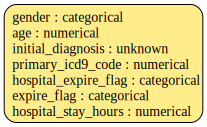

In [49]:
print('Auto detected data:\n')
metadata.visualize()

In [50]:
metadata.update_column(
    column_name='initial_diagnosis',
    sdtype='categorical',
)

In [51]:
metadata.validate()
metadata.validate_data(data=real_data)

In [52]:
metadata.save_to_json('test_datasets/metadata_processed_diabetes.json')

In [53]:
# in the future, we can reload the metadata object from the file
metadata = SingleTableMetadata.load_from_json('test_datasets/metadata_processed_diabetes.json')

In [54]:
synthetic_data = pd.read_csv("test_datasets/syn_data_diabetes.csv", index_col=0)
print(f"Synthetic dataset has {synthetic_data.shape[0]} instances with {synthetic_data.shape[1]} features")

Synthetic dataset has 200 instances with 7 features


In [55]:
synthetic_data.head()

,gender,age,initial_diagnosis,primary_icd9_code,hospital_expire_flag,expire_flag,hospital_stay_hours
0,M,-257,PERIPHERAL INSUFFICIENCY;RIGHT FOOT,25003,True,True,728
1,M,152,PERIPHERAL INSUFFICIENCY;RIGHT FOOT,25095,False,True,1330
2,M,109,ENCEPHALOPATHY;TELEMETRY,25008,False,True,339
3,M,75,INFECTED RIGHT FOOT,25079,False,True,356
4,M,51,DIABETIC KETOACIDOSIS,25089,False,False,387


In [56]:
diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...
(2/3) Evaluating Boundary: :   0%|          | 0/7 [00:00<?, ?it/s]

(3/3) Evaluating Synthesis: : 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

Diagnostic Results:

SUCCESS:
✓ The synthetic data covers over 90% of the numerical ranges present in the real data
✓ Over 90% of the synthetic rows are not copies of the real data

! The synthetic data is missing more than 10% of the categories present in the real data
! More than 10% the synthetic data does not follow the min/max boundaries set by the real data


In [57]:
quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 21/21 [00:00<00:00, 53.30it/s]

Overall Quality Score: 53.23%

Properties:
- Column Shapes: 67.76%
- Column Pair Trends: 38.7%


In [58]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,gender,TVComplement,0.739452
1,age,KSComplement,0.668927
2,initial_diagnosis,TVComplement,0.072831
3,primary_icd9_code,KSComplement,0.762831
4,hospital_expire_flag,TVComplement,0.896096
5,expire_flag,TVComplement,0.934863
6,hospital_stay_hours,KSComplement,0.668516


In [59]:
for column in real_data.columns:
    # Generate the plot for the current column
    fig = get_column_plot(
        real_data=real_data,
        synthetic_data=synthetic_data,
        column_name=column,
        metadata=metadata
    )
    
    fig.show()

In [60]:

pairs = [['gender', 'age'], ['expire_flag', 'hospital_expire_flag'], ['primary_icd9_code', 'hospital_stay_hours']]

for p in pairs:
    fig = get_column_pair_plot(
        real_data=real_data,
        synthetic_data=synthetic_data,
        column_names=p,
        metadata=metadata
    )

    fig.show()